<a href="https://colab.research.google.com/github/Sapphrain/OpenSourceDev_JiwooChoi/blob/main/Distinction_of_Busan_Generation_of_Waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.5 MB/s eta 0:00:00


DataFrame Head:
       항목    구분      중구       서구       동구       영도구      부산진구       동래구   \
0   매립처리량  연간(톤)  2953.5  3478.53  2242.66  2592.257   8464.66  24958.43   
1   매립처리량  일일(톤)     1.1     1.30     0.90     1.000      3.30      9.60   
2   소각처리량  연간(톤)  5288.5  4468.50  3974.30  5153.400  14536.00   8770.10   
3   소각처리량  일일(톤)    14.5    12.20    10.90    14.100     39.80     24.00   
4  재활용처리량  연간(톤)  2927.4  2593.50  3465.70  5720.600  13475.10  10884.70   

        남구       북구       해운대구      사하구      금정구       강서구      연제구      수영구   \
0   8688.75  4182.81   7472.77  10653.13  3695.35  132174.0  3849.36  4891.32   
1      3.40     1.60      2.90      4.10     1.40      51.1     1.50     1.90   
2  10045.20  8772.50  24149.80  13076.50  9176.90    5153.9  7456.20  6076.70   
3     27.50    24.00     66.20     35.80    25.10      14.1    20.40    16.60   
4   7928.30  5845.30  17931.60  10409.60  9118.30    5596.8  7498.80  7257.60   

      사상구       기장군   
0  27027.7  11573

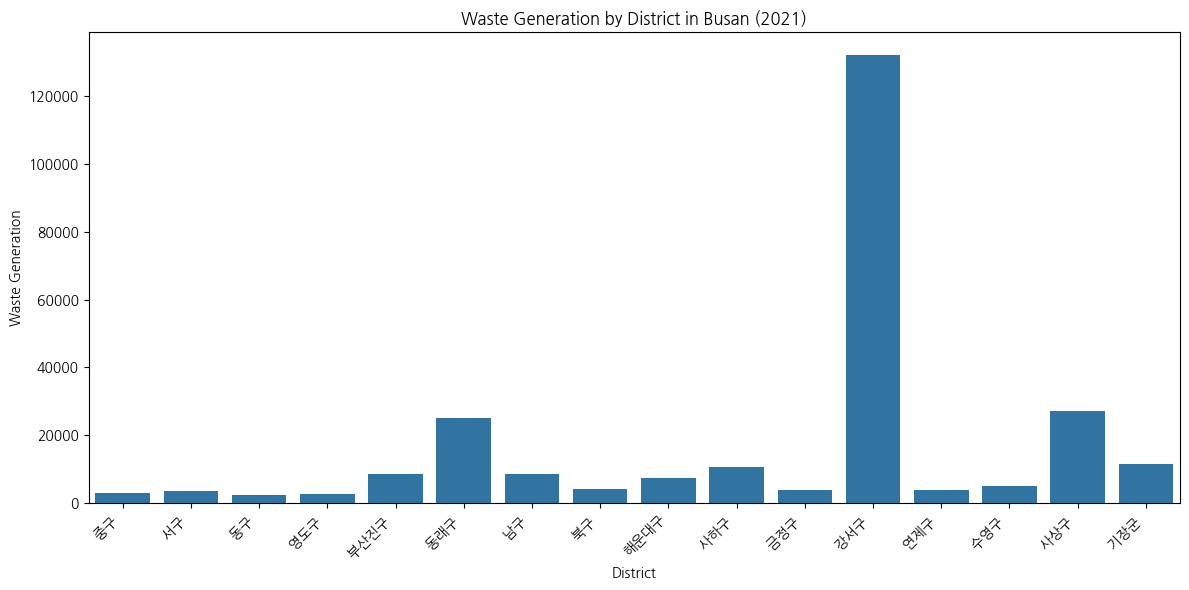


Waste Generation by District (Table Format):
   District  Waste Generation
0       중구           2953.500
1       서구           3478.530
2       동구           2242.660
3      영도구           2592.257
4     부산진구           8464.660
5      동래구          24958.430
6       남구           8688.750
7       북구           4182.810
8      해운대구          7472.770
9      사하구          10653.130
10     금정구           3695.350
11     강서구         132174.000
12     연제구           3849.360
13     수영구           4891.320
14     사상구          27027.700
15     기장군          11573.050


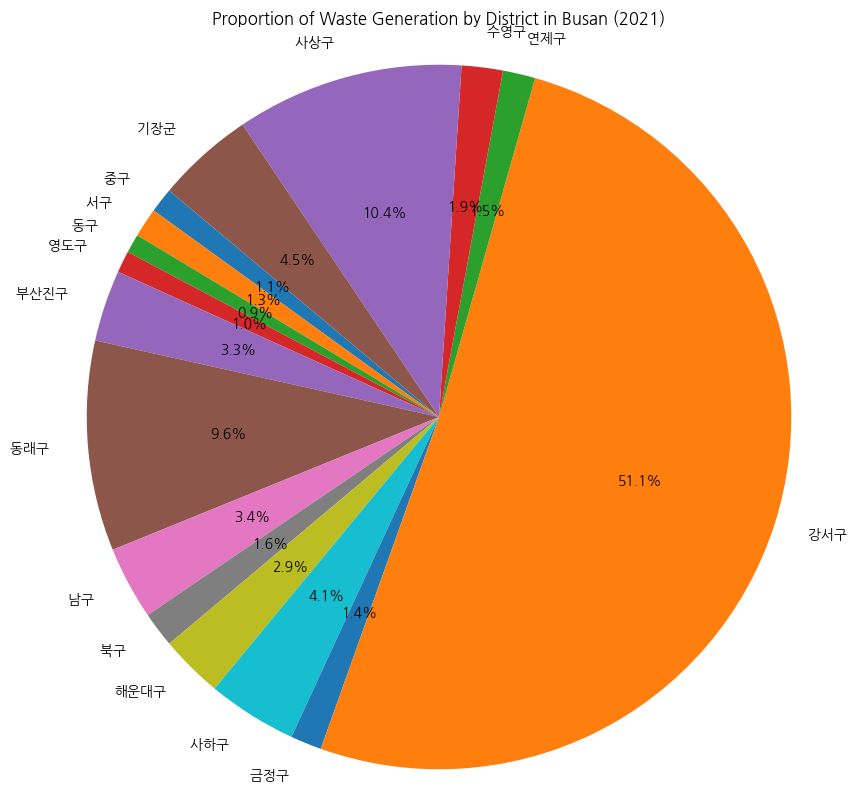


Melted DataFrame Head:
        항목 District   Waste
10   매립처리량      중구   2953.5
11   매립처리량      중구      1.1
12   소각처리량      중구   5288.5
13   소각처리량      중구     14.5
14  재활용처리량      중구   2927.4

Waste Generation by Type in Jung-gu:
Empty DataFrame
Columns: [항목, District, Waste]
Index: []


In [7]:
# prompt: /content/부산광역시_쓰레기발생량 현황_20211231.csv 데이터로 중구	서구	동구값 영도구값...
# 등등 구별로 쓰레기발생량을 다양한 형태로 나타내줘

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/부산광역시_쓰레기발생량 현황_20211231.csv', encoding='euc-kr')

# Display the first few rows and columns to understand the structure
print("DataFrame Head:")
print(df.head())
print("\nDataFrame Columns:")
print(df.columns)

# Assuming the column names are in the format '구이름' or similar
# We need to identify the columns that represent each district's waste generation.
# Let's look for columns that likely represent districts and their waste data.

# You might need to adjust the column names based on the actual CSV file.
# For example, if the column names are exactly '중구', '서구', '동구', etc., you can use them directly.
# If there are other columns like '총계' or years, exclude them.

# Let's assume the district columns are all the columns except the first one
# which might be a descriptor like '종류' or '년도'.
# We'll try to identify the district columns programmatically or by inspection.

# A common pattern is that district names are the column headers
# Let's try to identify columns that look like district names.
# We'll assume the columns from the second column onwards are district data.
# You might need to adjust the index [1:] based on your actual file.
district_columns = df.columns[1:]

# You might want to exclude a '총계' column if it exists
if '총계' in district_columns:
    district_columns = district_columns.drop('총계')

print("\nIdentified District Columns:")
print(district_columns)

# --- Data Analysis and Visualization Examples ---

# 1. Display the waste generation for each district
print("\nWaste Generation by District (assuming the first row is data):")
# If the first row contains the total waste for each district, you can access it like this:
# Assuming the first row of data contains the relevant values
district_waste_data = df.iloc[0][district_columns]
print(district_waste_data)

# 2. Bar plot of waste generation by district
plt.figure(figsize=(12, 6))
# Pass the Series directly to seaborn.barplot and specify x and y.
# This allows seaborn to correctly handle the categorical index and numerical values.
# We also ensure the data is numeric before plotting.
district_waste_data_numeric = pd.to_numeric(district_waste_data, errors='coerce').dropna()

# Now plot using the cleaned numeric data
sns.barplot(x=district_waste_data_numeric.index, y=district_waste_data_numeric.values)
plt.title('Waste Generation by District in Busan (2021)')
plt.xlabel('District')
plt.ylabel('Waste Generation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Display waste generation in a table format
print("\nWaste Generation by District (Table Format):")
# Use the potentially cleaned numeric data for the table as well
waste_table = pd.DataFrame({
    'District': district_waste_data_numeric.index,
    'Waste Generation': district_waste_data_numeric.values
})
print(waste_table)

# 4. Pie chart of the proportion of waste generated by each district
plt.figure(figsize=(10, 10))
# Use the potentially cleaned numeric data for the pie chart as well
plt.pie(district_waste_data_numeric.values, labels=district_waste_data_numeric.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Waste Generation by District in Busan (2021)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# --- More detailed analysis if the data has multiple rows (e.g., by type of waste) ---
# If your CSV has rows for different types of waste (e.g., food waste, general waste),
# you might want to analyze the breakdown by district and waste type.

# Let's assume the first column is '종류' (Type) and the subsequent columns are districts
# You would need to verify the column names from your file's head() output.

# Example: Analyze waste generation for a specific type (e.g., '음식물류 폐기물' - Food Waste)
# Find the row corresponding to '음식물류 폐기물' (assuming '종류' is the first column name)
# You need to replace '종류' and '음식물류 폐기물' with the actual column name and value
# if they are different in your file.

# Identify the column containing the waste type information.
# Let's assume it's the first column and named '구분' or similar.
# You need to inspect your df.head() output to know the exact column name.
type_column_name = df.columns[0] # Replace with the actual name if different

# Example: Get data for '총계' (Total) row if it exists in the type column
# You need to check the values in the type column.
total_waste_row = df[df[type_column_name] == '총계']

if not total_waste_row.empty:
    print("\nTotal Waste Generation by District (from '총계' row):")
    total_district_waste = total_waste_row.iloc[0][district_columns]
    print(total_district_waste)

    # Bar plot for total waste by district
    plt.figure(figsize=(12, 6))
    # Ensure the data is numeric before plotting
    total_district_waste_numeric = pd.to_numeric(total_district_waste, errors='coerce').dropna()
    sns.barplot(x=total_district_waste_numeric.index, y=total_district_waste_numeric.values)
    plt.title('Total Waste Generation by District in Busan (2021)')
    plt.xlabel('District')
    plt.ylabel('Total Waste Generation')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example: Analyze a specific waste type like '생활폐기물' (Household Waste)
# Replace '생활폐기물' with the actual waste type string from your data
specific_waste_type = '생활폐기물' # Example waste type

specific_waste_row = df[df[type_column_name] == specific_waste_type]

if not specific_waste_row.empty:
    print(f"\n{specific_waste_type} Generation by District:")
    specific_district_waste = specific_waste_row.iloc[0][district_columns]
    print(specific_district_waste)

    # Bar plot for specific waste type by district
    plt.figure(figsize=(12, 6))
    # Ensure the data is numeric before plotting
    specific_district_waste_numeric = pd.to_numeric(specific_district_waste, errors='coerce').dropna()
    sns.barplot(x=specific_district_waste_numeric.index, y=specific_district_waste_numeric.values)
    plt.title(f'{specific_waste_type} Generation by District in Busan (2021)')
    plt.xlabel('District')
    plt.ylabel(f'{specific_waste_type} Generation')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# If you want to see the breakdown for all waste types across all districts,
# you can melt the DataFrame (transform from wide to long format).

# Melt the DataFrame to have 'Type', 'District', and 'Waste' columns
# You need to know the column name for the waste type ('id_vars') and the district columns ('value_vars').
# Assuming 'Type' column is the first one and its name is type_column_name
# And district columns are stored in the district_columns variable

df_melted = df.melt(id_vars=[type_column_name], value_vars=district_columns,
                    var_name='District', value_name='Waste')

# Convert 'Waste' column to numeric, coercing errors to NaN
df_melted['Waste'] = pd.to_numeric(df_melted['Waste'], errors='coerce')

# Drop rows where Waste is NaN (if conversion failed)
df_melted.dropna(subset=['Waste'], inplace=True)

print("\nMelted DataFrame Head:")
print(df_melted.head())

# Example: See waste generation by type for a specific district (e.g., '중구')
specific_district_data = df_melted[df_melted['District'] == '중구']
print("\nWaste Generation by Type in Jung-gu:")
print(specific_district_data)

# Bar plot of waste types in a specific district
if not specific_district_data.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=type_column_name, y='Waste', data=specific_district_data)
    plt.title(f'Waste Generation by Type in Jung-gu (2021)')
    plt.xlabel('Waste Type')
    plt.ylabel('Waste Generation')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example: Grouped bar chart showing waste type breakdown for a few districts
# Select a few districts for comparison
selected_districts = ['중구', '서구', '동구', '영도구']
df_selected_districts = df_melted[df_melted['District'].isin(selected_districts)]

# Filter out '총계' or other summary rows from the waste types if they exist
# You need to know the exact string for '총계' or other summaries in your type_column_name
df_selected_districts_filtered = df_selected_districts[df_selected_districts[type_column_name] != '총계'] # Example filter

if not df_selected_districts_filtered.empty:
    plt.figure(figsize=(15, 8))
    sns.barplot(x=type_column_name, y='Waste', hue='District', data=df_selected_districts_filtered)
    plt.title('Waste Generation by Type for Selected Districts (2021)')
    plt.xlabel('Waste Type')
    plt.ylabel('Waste Generation')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='District')
    plt.tight_layout()
    plt.show()